### Gaussian Process
Source: https://katbailey.github.io/post/gaussian-processes-for-dummies/

In [29]:
using LinearAlgebra
using PyPlot

In [30]:
# Test data
x1 = -5.0
x2 = +5.0
n = 100
x_test = range(x1, x2, length=n)

-5.0:0.10101010101010101:5.0

In [31]:
function kernel(a, b, param)
    sq_dist = (a .- b').^2
    return exp.(-0.50 * (1 / param) * sq_dist)
end

kernel (generic function with 1 method)

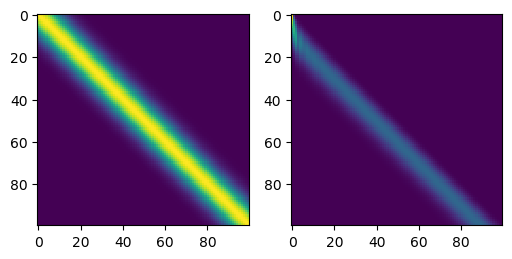

PyObject <matplotlib.image.AxesImage object at 0x7f1f5ce0a8d0>

In [32]:
param = 0.50
K_ss = kernel(x_test, x_test, param)

# do cholesky decomposition
# C = cholesky(K_ss + 1e-1I)
C = cholesky(K_ss + 1e-5I)

fig, ax = subplots(1, 2, figsize=(6, 3))
ax[1].imshow(K_ss, vmin=0.0, vmax=1.0)
ax[2].imshow(C.L, vmin=0.0, vmax=1.0)

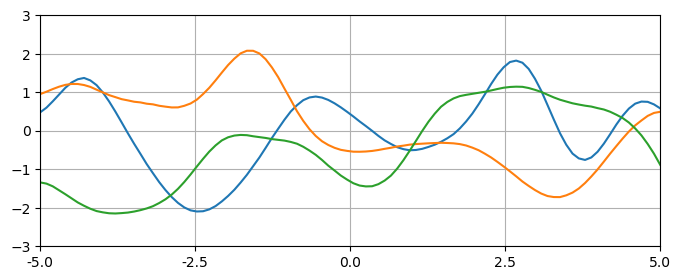

In [33]:
# plot a sampled function
f_prior = C.L * randn(n, 3);

fig = figure(figsize=(8, 3))
plot(1:n, f_prior)
axis([1, n, -3, +3])
xticks(range(1, n, length=5), range(x1, x2, length=5))
grid(true)

### Adding observations

In [40]:
# add some observations
gen_func(x) = sin(x) + cos(x)

n_samples = 10
x_train = (x2 - x1) * rand(n_samples) .+ x1
y_train = gen_func.(x_train)

10-element Array{Float64,1}:
  1.4110938972764298
  0.928611575035417
 -0.9668923861266889
 -0.07724256429530318
  0.4355529591266604
  1.125895033307807
 -1.259896738813025
  0.7616287134655597
  0.7759007288267347
  0.7523526703218815

In [41]:
# apply kernel function to training points
K = kernel(x_train, x_train, param)
C_train = cholesky(K + 5e-5I);

In [42]:
# Compute the mean at test points
K_s = kernel(x_train, x_test, param)
Lk = C_train.L \ K_s
mu = Lk' * (C_train.L \ y_train);

In [43]:
#  Compute the std dev
s2 = diag(K_ss) - sum(Lk.^2, dims=1)'
stdv = .√s2

K_full = K_ss + 1e-6I - Lk' * Lk
L_post = cholesky(K_full).L;

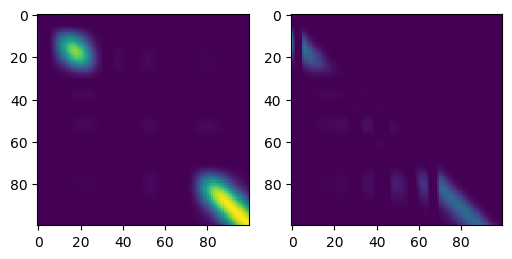

PyObject <matplotlib.image.AxesImage object at 0x7f1f5caeaa10>

In [44]:
fig, ax = subplots(1, 2, figsize=(6, 3))
ax[1].imshow(K_full, vmin=0.0, vmax=1.0)
ax[2].imshow(L_post, vmin=0.0, vmax=1.0)

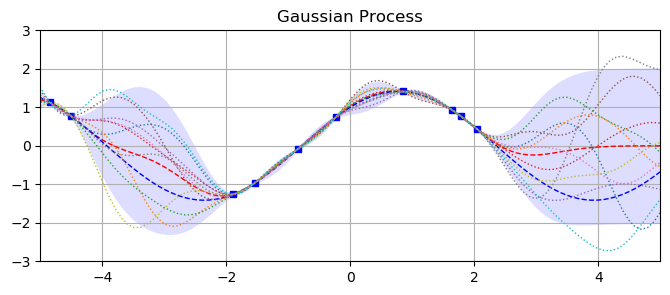

PyObject Text(0.5, 1, 'Gaussian Process')

In [45]:
f_post = mu .+ L_post * randn(n, 10)
# plot results
figure(figsize=(8, 3))
plot(x_train, y_train, "bs", ms=4)
plot(x_test, mu, "r--", lw=1)
plot(x_test, gen_func.(x_test), "b--", lw=1)
fill_between(x_test, mu .- 2stdv[:], mu .+ 2stdv[:], color="#ddddff")
axis([-5, +5, -3, +3])
plot(x_test, f_post, ":", lw=1)
# axis([1, n, -3, +3])
# xticks(range(1, n, length=5), range(x1, x2, length=5))
grid(true)
title("Gaussian Process")